In [1]:
import numpy as np
import pandas as pd

In [2]:
import json

In [3]:
# with open('intents.json','r') as f:
#     data = json.loads(f.read())
# # Flatten data
# df_nested_list = pd.json_normalize(data, record_path =['intents'])

with open('intents.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])
df



dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)
        
df_nested_list = pd.DataFrame.from_dict(dic)
df_nested_list


,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...
...,...,...,...
227,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or beha..."
228,fact-30,How can I maintain social connections? What if...,"[A lot of people are alone right now, but we d..."
229,fact-31,What's the difference between anxiety and stress?,[Stress and anxiety are often used interchange...
230,fact-32,What's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap..."


In [4]:
df_nested_list

,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...
...,...,...,...
227,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or beha..."
228,fact-30,How can I maintain social connections? What if...,"[A lot of people are alone right now, but we d..."
229,fact-31,What's the difference between anxiety and stress?,[Stress and anxiety are often used interchange...
230,fact-32,What's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap..."


In [5]:
df_nested_list['tag'].unique()


array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no-response', 'neutral-response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
       'depressed', 'happy', 'casual', 'anxious', 'not-talking', 'sleep',
       'scared', 'death', 'understand', 'done', 'suicide', 'hate-you',
       'hate-me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
       'location', 'something-else', 'friends', 'ask', 'problem',
       'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user-meditation', 'pandora-useful', 'user-advice',
       'learn-mental-health', 'mental-health-fact', 'fact-1', 'fact-2',
       'fact-3', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9',
       'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14', 'fact-15',
       'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-20', 'fact-21',
       'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26', 'fact-27',
       'fact-28', 'fact-29', '

### Data Pre-processing

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer




In [7]:
tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df_nested_list['patterns'])
tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 232,
 'word_counts': '{"hi": 2, "hey": 2, "is": 13, "anyone": 2, "there": 5, "hello": 1, "howdy": 1, "hola": 1, "bonjour": 1, "konnichiwa": 1, "guten": 1, "tag": 1, "ola": 1, "good": 5, "morning": 1, "afternoon": 1, "evening": 1, "night": 1, "bye": 3, "see": 2, "you": 38, "later": 1, "goodbye": 1, "au": 1, "revoir": 1, "sayonara": 1, "ok": 4, "then": 1, "fare": 1, "thee": 1, "well": 2, "thanks": 2, "thank": 3, "that\'s": 3, "helpful": 1, "for": 10, "the": 10, "help": 6, "than": 1, "very": 3, "much": 4, "nothing": 3, "who": 6, "are": 15, "what": 29, "tell": 6, "me": 19, "more": 6, "about": 20, "yourself": 3, "your": 3, "name": 4, "should": 3, "i": 95, "call": 1, "what\'s": 3, "can": 16, "do": 14, "created": 2, "how": 8, "were": 2, "made": 1, "my": 13, "am": 17, "go": 4, "by": 1, "could": 2, "give": 1, "a": 12, "hand": 1, "ple

In [8]:
vacab_size = len(tokenizer.word_index)
print('number of unique words = ', vacab_size)

number of unique words =  303


In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

ptrn2seq = tokenizer.texts_to_sequences(df_nested_list['patterns'])
X = pad_sequences(ptrn2seq, padding='post')
print('X shape = ', X.shape)

lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(df_nested_list['tag'])
print('y shape = ', y.shape)
print('num of classes = ', len(np.unique(y)))

X shape =  (232, 18)
y shape =  (232,)
num of classes =  80


### Build and train model

In [10]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 100)           30400     
                                                                 
 lstm (LSTM)                 (None, 18, 32)            17024     
                                                                 
 layer_normalization (LayerN  (None, 18, 32)           64        
 ormalization)                                                   
                                                                 
 lstm_1 (LSTM)               (None, 18, 32)            8320      
                                                                 
 layer_normalization_1 (Laye  (None, 18, 32)           64        
 rNormalization)                                                 
                                                                 
 lstm_2 (LSTM)               (None, 32)                8

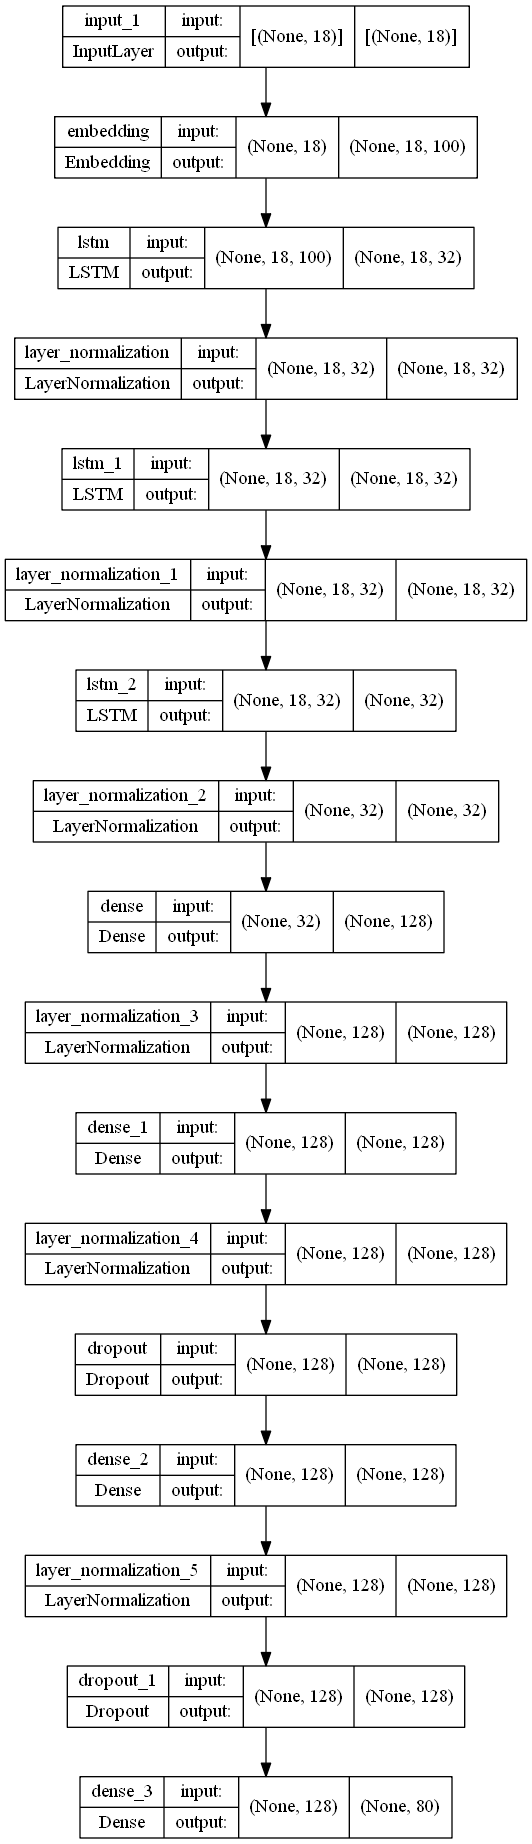

In [12]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Input(shape=(X.shape[1])))
model.add(Embedding(input_dim=vacab_size+1, output_dim=100, mask_zero=True))
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32))
model.add(LayerNormalization())
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation="softmax"))
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)

In [13]:
model_history = model.fit(x=X,
                          y=y,
                          batch_size=10,
                          callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3000)],
                          epochs=1000)

Epoch 1/1000
24/24 [==============================] - 28s 56ms/step - loss: 4.9434 - accuracy: 0.0086
Epoch 2/1000
24/24 [==============================] - 1s 55ms/step - loss: 3.9451 - accuracy: 0.1034
Epoch 3/1000
24/24 [==============================] - 1s 55ms/step - loss: 3.2606 - accuracy: 0.2543
Epoch 4/1000
24/24 [==============================] - 1s 55ms/step - loss: 2.7163 - accuracy: 0.3750
Epoch 5/1000
24/24 [==============================] - 1s 54ms/step - loss: 2.2978 - accuracy: 0.4526
Epoch 6/1000
24/24 [==============================] - 1s 54ms/step - loss: 2.0082 - accuracy: 0.4871
Epoch 7/1000
24/24 [==============================] - 1s 55ms/step - loss: 1.5458 - accuracy: 0.6853
Epoch 8/1000
24/24 [==============================] - 1s 55ms/step - loss: 1.3495 - accuracy: 0.7026
Epoch 9/1000
24/24 [==============================] - 1s 54ms/step - loss: 1.1212 - accuracy: 0.7629
Epoch 10/1000
24/24 [==============================] - 1s 55ms/step - loss: 0.9250 - accur

24/24 [==============================] - 1s 54ms/step - loss: 1.5635 - accuracy: 0.5819
Epoch 82/1000
24/24 [==============================] - 1s 54ms/step - loss: 1.3042 - accuracy: 0.6509
Epoch 83/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.7885 - accuracy: 0.7586
Epoch 84/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.5274 - accuracy: 0.8750
Epoch 85/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.3393 - accuracy: 0.9181
Epoch 86/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.2084 - accuracy: 0.9483
Epoch 87/1000
24/24 [==============================] - 1s 55ms/step - loss: 0.1428 - accuracy: 0.9698
Epoch 88/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.1248 - accuracy: 0.9741
Epoch 89/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.0514 - accuracy: 0.9871
Epoch 90/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.0485 - accuracy: 0

24/24 [==============================] - 1s 61ms/step - loss: 0.0117 - accuracy: 0.9914
Epoch 161/1000
24/24 [==============================] - 1s 58ms/step - loss: 0.0167 - accuracy: 0.9957
Epoch 162/1000
24/24 [==============================] - 1s 52ms/step - loss: 0.0108 - accuracy: 0.9957
Epoch 163/1000
24/24 [==============================] - 1s 51ms/step - loss: 0.0130 - accuracy: 0.9914
Epoch 164/1000
24/24 [==============================] - 1s 46ms/step - loss: 0.0086 - accuracy: 0.9957
Epoch 165/1000
24/24 [==============================] - 1s 41ms/step - loss: 0.0085 - accuracy: 0.9914
Epoch 166/1000
24/24 [==============================] - 1s 38ms/step - loss: 0.0081 - accuracy: 0.9957
Epoch 167/1000
24/24 [==============================] - 1s 44ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 168/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.0116 - accuracy: 0.9957
Epoch 169/1000
24/24 [==============================] - 1s 56ms/step - loss: 0.0090 - ac

24/24 [==============================] - 1s 55ms/step - loss: 0.0097 - accuracy: 0.9957
Epoch 240/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.0086 - accuracy: 0.9957
Epoch 241/1000
24/24 [==============================] - 1s 52ms/step - loss: 0.0073 - accuracy: 0.9957
Epoch 242/1000
24/24 [==============================] - 1s 48ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 243/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0130 - accuracy: 0.9914
Epoch 244/1000
24/24 [==============================] - 1s 52ms/step - loss: 0.0109 - accuracy: 0.9914
Epoch 245/1000
24/24 [==============================] - 1s 48ms/step - loss: 0.0116 - accuracy: 0.9957
Epoch 246/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0069 - accuracy: 0.9957
Epoch 247/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0101 - accuracy: 0.9914
Epoch 248/1000
24/24 [==============================] - 1s 51ms/step - loss: 0.0044 - ac

24/24 [==============================] - 1s 52ms/step - loss: 0.0112 - accuracy: 0.9914
Epoch 319/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 320/1000
24/24 [==============================] - 1s 52ms/step - loss: 0.0121 - accuracy: 0.9914
Epoch 321/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0086 - accuracy: 0.9957
Epoch 322/1000
24/24 [==============================] - 1s 48ms/step - loss: 0.0109 - accuracy: 0.9957
Epoch 323/1000
24/24 [==============================] - 1s 51ms/step - loss: 0.0176 - accuracy: 0.9957
Epoch 324/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0174 - accuracy: 0.9957
Epoch 325/1000
24/24 [==============================] - 1s 38ms/step - loss: 0.0103 - accuracy: 0.9957
Epoch 326/1000
24/24 [==============================] - 1s 33ms/step - loss: 0.0071 - accuracy: 0.9957
Epoch 327/1000
24/24 [==============================] - 1s 32ms/step - loss: 0.0107 - ac

24/24 [==============================] - 1s 56ms/step - loss: 0.0996 - accuracy: 0.9698
Epoch 398/1000
24/24 [==============================] - 1s 56ms/step - loss: 0.2319 - accuracy: 0.9310
Epoch 399/1000
24/24 [==============================] - 1s 57ms/step - loss: 0.7649 - accuracy: 0.8362
Epoch 400/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.8333 - accuracy: 0.8147
Epoch 401/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.6319 - accuracy: 0.8448
Epoch 402/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.2559 - accuracy: 0.9052
Epoch 403/1000
24/24 [==============================] - 1s 49ms/step - loss: 0.1005 - accuracy: 0.9655
Epoch 404/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.0666 - accuracy: 0.9784
Epoch 405/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.0464 - accuracy: 0.9871
Epoch 406/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.0237 - ac

24/24 [==============================] - 1s 55ms/step - loss: 0.0104 - accuracy: 0.9914
Epoch 477/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 478/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.0110 - accuracy: 0.9914
Epoch 479/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.0140 - accuracy: 0.9914
Epoch 480/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.0150 - accuracy: 0.9914
Epoch 481/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.0087 - accuracy: 0.9914
Epoch 482/1000
24/24 [==============================] - 1s 55ms/step - loss: 0.0066 - accuracy: 0.9957
Epoch 483/1000
24/24 [==============================] - 1s 55ms/step - loss: 0.0089 - accuracy: 0.9957
Epoch 484/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.0076 - accuracy: 0.9914
Epoch 485/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.0075 - ac

24/24 [==============================] - 1s 56ms/step - loss: 1.0313 - accuracy: 0.7845
Epoch 556/1000
24/24 [==============================] - 1s 57ms/step - loss: 0.4657 - accuracy: 0.8836
Epoch 557/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.3032 - accuracy: 0.9052
Epoch 558/1000
24/24 [==============================] - 1s 48ms/step - loss: 0.2420 - accuracy: 0.9353
Epoch 559/1000
24/24 [==============================] - 1s 52ms/step - loss: 0.0960 - accuracy: 0.9655
Epoch 560/1000
24/24 [==============================] - 1s 55ms/step - loss: 0.0618 - accuracy: 0.9914
Epoch 561/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.0177 - accuracy: 0.9957
Epoch 562/1000
24/24 [==============================] - 1s 55ms/step - loss: 0.0187 - accuracy: 0.9914
Epoch 563/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.0174 - accuracy: 0.9914
Epoch 564/1000
24/24 [==============================] - 1s 55ms/step - loss: 0.0183 - ac

24/24 [==============================] - 1s 55ms/step - loss: 0.0081 - accuracy: 0.9957
Epoch 635/1000
24/24 [==============================] - 1s 52ms/step - loss: 0.0094 - accuracy: 0.9914
Epoch 636/1000
24/24 [==============================] - 1s 52ms/step - loss: 0.0085 - accuracy: 0.9914
Epoch 637/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0065 - accuracy: 0.9957
Epoch 638/1000
24/24 [==============================] - 1s 52ms/step - loss: 0.0067 - accuracy: 0.9957
Epoch 639/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.0064 - accuracy: 0.9957
Epoch 640/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.0120 - accuracy: 0.9914
Epoch 641/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0058 - accuracy: 0.9957
Epoch 642/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 643/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0112 - ac

24/24 [==============================] - 1s 55ms/step - loss: 0.0117 - accuracy: 0.9957
Epoch 714/1000
24/24 [==============================] - 1s 55ms/step - loss: 0.0075 - accuracy: 0.9957
Epoch 715/1000
24/24 [==============================] - 1s 55ms/step - loss: 0.0092 - accuracy: 0.9957
Epoch 716/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.0098 - accuracy: 0.9914
Epoch 717/1000
24/24 [==============================] - 1s 55ms/step - loss: 0.0065 - accuracy: 0.9957
Epoch 718/1000
24/24 [==============================] - 1s 55ms/step - loss: 0.0068 - accuracy: 0.9957
Epoch 719/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.0065 - accuracy: 0.9957
Epoch 720/1000
24/24 [==============================] - 1s 55ms/step - loss: 0.0057 - accuracy: 0.9957
Epoch 721/1000
24/24 [==============================] - 1s 55ms/step - loss: 0.0071 - accuracy: 0.9957
Epoch 722/1000
24/24 [==============================] - 1s 55ms/step - loss: 0.0064 - ac

24/24 [==============================] - 1s 55ms/step - loss: 0.0058 - accuracy: 0.9957
Epoch 793/1000
24/24 [==============================] - 1s 56ms/step - loss: 0.0098 - accuracy: 0.9957
Epoch 794/1000
24/24 [==============================] - 1s 56ms/step - loss: 0.0082 - accuracy: 0.9914
Epoch 795/1000
24/24 [==============================] - 1s 56ms/step - loss: 0.0072 - accuracy: 0.9957
Epoch 796/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.0085 - accuracy: 0.9914
Epoch 797/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 798/1000
24/24 [==============================] - 1s 51ms/step - loss: 0.0076 - accuracy: 0.9914
Epoch 799/1000
24/24 [==============================] - 1s 57ms/step - loss: 0.0090 - accuracy: 0.9914
Epoch 800/1000
24/24 [==============================] - 1s 56ms/step - loss: 0.0076 - accuracy: 0.9957
Epoch 801/1000
24/24 [==============================] - 1s 57ms/step - loss: 0.0049 - ac

24/24 [==============================] - 1s 59ms/step - loss: 0.0293 - accuracy: 0.9871
Epoch 872/1000
24/24 [==============================] - 1s 58ms/step - loss: 0.0112 - accuracy: 0.9957
Epoch 873/1000
24/24 [==============================] - 1s 54ms/step - loss: 0.0155 - accuracy: 0.9914
Epoch 874/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0189 - accuracy: 0.9871
Epoch 875/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 876/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0134 - accuracy: 0.9914
Epoch 877/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0170 - accuracy: 0.9957
Epoch 878/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0097 - accuracy: 0.9957
Epoch 879/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0091 - accuracy: 0.9957
Epoch 880/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0098 - ac

24/24 [==============================] - 1s 52ms/step - loss: 0.0182 - accuracy: 0.9957
Epoch 951/1000
24/24 [==============================] - 1s 52ms/step - loss: 0.0113 - accuracy: 0.9957
Epoch 952/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0171 - accuracy: 0.9914
Epoch 953/1000
24/24 [==============================] - 1s 52ms/step - loss: 0.0119 - accuracy: 0.9914
Epoch 954/1000
24/24 [==============================] - 1s 52ms/step - loss: 0.0078 - accuracy: 0.9957
Epoch 955/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0065 - accuracy: 0.9957
Epoch 956/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0082 - accuracy: 0.9914
Epoch 957/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 958/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 959/1000
24/24 [==============================] - 1s 53ms/step - loss: 0.0035 - ac

In [14]:
import re
import random


def generate_answer(pattern): 
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)
        
    x_test = tokenizer.texts_to_sequences(text)
    x_test = np.array(x_test).squeeze()
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()
    tag = lbl_enc.inverse_transform([y_pred])[0]
    responses = df_nested_list[df_nested_list['tag'] == tag]['responses'].values[0]

    print("you: {}".format(pattern))
    print("model: {}".format(random.choice(responses)))

In [15]:
generate_answer('Well... I\'m feeling sad!')

you: Well... I'm feeling sad!
model: I'm sorry to hear that. I'm here for you. Talking about it might help. So, tell me why do you think you're feeling this way?


In [16]:
generate_answer('You do not understand me.')

you: You do not understand me.
model: I'm sorry to hear that. I'm doing my best to help


In [17]:
generate_answer('bye bye')

you: bye bye
model: Bye! Come back again.


In [18]:
generate_answer('I want to die')

you: I want to die
model: I'm very sorry to hear that but you have so much to look forward to. Please seek help by contacting: 9152987821.


In [19]:
generate_answer('heloooooo hello hi')

you: heloooooo hello hi
model: Hello there. Glad to see you're back. What's going on in your world right now?


In [20]:
generate_answer('What treatment options are available?')

you: What treatment options are available?
model: Just as there are different types of medications for physical illness, different treatment options are available for individuals with mental illness. Treatment works differently for different people. It is important to find what works best for you or your child.


In [21]:
generate_answer('Can people with mental illness recover?')

you: Can people with mental illness recover?
model: When healing from mental illness, early identification and treatment are of vital importance. Based on the nature of the illness, there are a range of effective treatments available. For any type of treatment, it is essential that the person affected is proactive and fully engaged in their own recovery process. Many people with mental illnesses who are diagnosed and treated respond well, although some might experience a return of symptoms. Even in such cases, with careful monitoring and management of the disorder, it is still quite possible to live a fulfilled and productive life.


In [22]:
generate_answer('I can not sleep')

you: I can not sleep
model: What do you think is the reason behind this?


In [23]:
generate_answer('I do not know')

you: I do not know
model: It's only natural to feel this way. Tell me more. What else is on your mind?


In [24]:
generate_answer('from past week')

you: from past week
model: That seem awful. What do you think is behind this?


In [25]:
generate_answer('thank you so much for your help')

you: thank you so much for your help
model: You're most welcome!


In [26]:
generate_answer('hello, Good Morning')

you: hello, Good Morning
model: Good morning. I hope you had a good night's sleep. How are you feeling today? 


In [27]:
generate_answer('not too good')

you: not too good
model: I'm listening. Please go on.


In [28]:
generate_answer('Goodbye, thank you ')

you: Goodbye, thank you 
model: I'll see you soon.


In [29]:
from joblib import dump 
dump(model, 'model.joblib') 

INFO:tensorflow:Assets written to: ram://3015bee6-0218-4d31-bf95-14259184d00b/assets


INFO:tensorflow:Assets written to: ram://3015bee6-0218-4d31-bf95-14259184d00b/assets


['model.joblib']

In [30]:
from joblib import dump 
dump(model, 'model.sav') 

INFO:tensorflow:Assets written to: ram://f8837a21-d2cd-4299-960f-c1b77c0e6daf/assets


INFO:tensorflow:Assets written to: ram://f8837a21-d2cd-4299-960f-c1b77c0e6daf/assets


['model.sav']

In [31]:
generate_answer('i am depressed')

you: i am depressed
model: Talk to me. Tell me more. It helps if you open up yourself to someone else.


In [32]:
generate_answer('I do not know what to do')

you: I do not know what to do
model: A therapist is a broad designation that refers to professionals who are trained to provide treatment and rehabilitation. The term is often applied to psychologists, but it can include others who provide a variety of services, including social workers, counselors, life coaches, and many others. 


In [33]:
generate_answer('I do not know why I am alive')

you: I do not know why I am alive
model: Bye! Come back again.


In [34]:
generate_answer('from a month')

you: from a month
model: What do you think is the reason behind this?


In [35]:
generate_answer('for past month')

you: for past month
model: You're most welcome!


In [36]:
generate_answer('how to do that')

you: how to do that
model: Somewhere in the universe


In [37]:
generate_answer('I am very sad')

you: I am very sad
model: How long have you been feeling this way?


In [38]:
generate_answer('no one likes me')

you: no one likes me
model: i first want to let you know that you are not alone in your feelings and there is always someone there to help . you can always change your feelings and change your way of thinking by being open to trying to change.


In [39]:
generate_answer('my dog used to like me but he passed away')

you: my dog used to like me but he passed away
model: I'm sorry to hear that. If you want to talk about it. I'm here.


In [40]:
generate_answer('but you are not my friend')

you: but you are not my friend
model: I'm sorry to hear that. I'm doing my best to help


In [41]:
generate_answer('can we prevent mental health problems?')

you: can we prevent mental health problems?
model: The most important thing is to talk to someone you trust. This might be a friend, colleague, family member, or GP. In addition to talking to someone, it may be useful to find out more information about what you are experiencing. These things may help to get some perspective on what you are experiencing, and be the start of getting help.


In [42]:
generate_answer('hello,i feel blue today')

you: hello,i feel blue today
model: Did something happen which made you feel this way?


In [43]:
generate_answer('I slept more than 20 hours today')

you: I slept more than 20 hours today
model: It's only natural to feel this way. Tell me more. What else is on your mind?


In [44]:
generate_answer('I slept more than 20 hours today')

you: I slept more than 20 hours today
model: Let's discuss further why you're feeling this way.


In [45]:
generate_answer('I am very happy today')

you: I am very happy today
model: Did something happen which made you feel this way?


In [50]:
generate_answer('I met with accident today')

you: I met with accident today
model: That's no problem. I can see why you'd be stressed out about that. I can suggest you some tips to alleviate this issue. Would you like to learn more about that?


In [51]:
generate_answer('yes, I would like to get to know about those tips')

you: yes, I would like to get to know about those tips
model: I'm trying my best to help you. So please talk to me


In [52]:
generate_answer('i am feeling sad')

you: i am feeling sad
model: I'm here for you. Could you tell me why you're feeling this way?


In [53]:
generate_answer('i do not know')

you: i do not know
model: i first want to let you know that you are not alone in your feelings and there is always someone there to help . you can always change your feelings and change your way of thinking by being open to trying to change.
